Adam = ADAptive Moment Estimation

Adam - адаптивная оценка момента. Используются две переменные скользящего среднего:

$v$ – первый момент
$s$ – второй момент
Алгоритм вычисляет экспоненциально взвешенное среднее прошлых градиентов и их квадратов градиентов. Эти скользящие средние затем используются для обновления параметров модели.

Алгоритм Адама состоит из следующих шагов:

Инициализация переменных. Алгоритм начинается с инициализации переменных скользящего среднего $v$ и $s$ - словарей для хранения экспоненциально взвешенных средних градиентов и квадратов градиентов соответственно.

Вычисление скользящих средних. Для каждого параметра модели алгоритм вычисляет скользящее среднее градиентов путем объединения текущего градиента с предыдущим скользящим средним. Также вычисляется скользящее среднее квадратов градиентов.
Коррекция смещения. Чтобы уменьшить смещение во время начальных итераций, Adam выполняет коррекцию смещения путем деления скользящих средних на поправочный коэффициент.
Обновление параметров. Алгоритм обновляет параметры модели, используя скользящие средние градиентов и квадраты градиентов.

\begin{aligned} s_t &= \beta_1 s_{t-1} + \left(1 – \beta_1 \right ) \nabla w_t \\v_t &= \beta_2 v_{t-1} + \left(1 – \beta_2 \right ) \left(\nabla w_t \right )^2 \\\hat{s_t} &= \frac{s_t}{1 – {\beta_1}^t}\\ \hat{v_t} &= \frac{v_t}{1 – {\beta_2}^t}\\ w_{t + 1} &= w_t – \frac{\alpha\hat{s_t}}{\sqrt{\hat{v_t} + \epsilon}}  \end{aligned}

$w_t$ - веса модели;

learning_rate ($\alpha$) - скорость обучения;

$\beta_1, \beta_2$ - скорости затухания для первого и второго моментов соответственно;

$s$ - оценка первого момента (среднее) градиентов;

$v$ - оценка второго момента (нецентрированная дисперсия) градиентов;

$t$ - текущая итерация;

$\epsilon$ - маленькое число, чтобы избежать деления на 0.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# целевая функция
def objective(x1, x2):
    return x1**2 + x2**2

# градиент целевой функции
def gradient(x1, x2):
    return np.array([2*x1, 2*x2])

# инициализация моментов
def init_adam():
    s = np.zeros(2)
    v = np.zeros(2)
    return s, v

# шаг Adam - пересчет параметров
def adam_update_weights(x, grad, s, v, iteration, learning_rate, beta1, beta2, epsylon = 1e-8):
    s = beta1*s + (1 - beta1)*grad
    v = beta2*v + (1 - beta2)*(grad**2)
    s_hat = s / (1 - beta1**(iteration + 1))
    v_hat = v / (1 - beta2**(iteration + 1))
    x -= learning_rate * s_hat / (np.sqrt(v_hat) + epsylon)
    return x, s, v

# алгоритм Adam
def adam(objective, grad, bounds, max_iter, learning_rate, beta1, beta2, epsylon = 1e-8):
    # начальная точка
    x = bounds[:, 0] + np.random.rand(len(bounds))*(bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    scores, trajectory = [], []
    # инициализация моментов
    s, v = init_adam()

    # градиентный спуск Adam
    for _ in range(max_iter):
        # вычисление градиента
        grad = gradient(x[0], x[1])

        # пересчет параметров
        x, s, v = adam_update_weights(x, grad, s, v, _, learning_rate, beta1, beta2, epsylon)

        # вычисление целевой функции
        score = objective(x[0], x[1])
        scores.append(score)
        trajectory.append(x.copy())

        # print(">%d f(%s) = %.15f" % (_, x, score))
    return x, scores, trajectory

np.random.seed(12345678)

# определение границ
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])

max_iter = 160
learning_rate = 0.01
beta1 = 0.8
beta2 = 0.999

# Градиентный спуск Adam
x_min, scores, trajectory = adam(objective, gradient, bounds, max_iter, learning_rate, beta1, beta2)
print("Минимум найден:")
print("f(%s) = %f" % (x_min, scores[-1]))

# визуализация
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z, cmap = 'viridis', alpha = 0.5)
ax.scatter(x_min[0], x_min[1], objective(x_min[0], x_min[1]), color = 'red', label = "Минимум")
ax.plot([point[0] for point in trajectory], [point[1] for point in trajectory], scores, color = "blue", label = "Траектория")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
fig.show()


Задание


Модифицировать класс градиентного спуска для линейной регрессии с использованием алгоритма Adam.
Сравнить скорость обучения и качество модели для набора данных videogames.

In [2]:
df = pd.read_csv('Video Games.csv')
df

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12
...,...,...,...,...,...,...,...,...,...
4253,3996,PSP,2010,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09
4254,5720,Wii,2007,Shooter,Nintendo,3.06,1.18,0.46,1.29
4255,4579,3DS,2015,Action,FuRyu,0.00,0.00,0.00,1.06
4256,4072,GB,1996,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27


# Предобработка данных

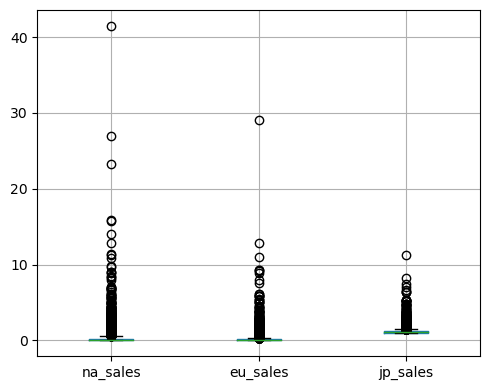

In [3]:
df_new = df.select_dtypes(exclude = 'object')
df_new[['na_sales', 'eu_sales', 'jp_sales']].boxplot(figsize=(5, 4))
plt.tight_layout()
plt.show()

In [4]:
df_new.describe()

,id,year,na_sales,eu_sales,other_sales,jp_sales
count,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000
mean,3028.044152,2006.576327,0.372240,0.231038,0.073852,1.213631
std,1752.862362,6.647677,1.308406,0.829889,0.277481,0.496650
min,2.000000,1983.000000,0.000000,0.000000,0.000000,1.010000
25%,1511.250000,2003.000000,0.000000,0.000000,0.000000,1.030000
50%,3015.500000,2008.000000,0.000000,0.000000,0.000000,1.070000
75%,4537.750000,2011.000000,0.250000,0.120000,0.040000,1.197500
max,6083.000000,2017.000000,41.490000,29.020000,8.460000,11.220000


In [5]:
df = df[df.na_sales <=10]
df = df[df.eu_sales < 7]
df = df[df.jp_sales < 10]
df = df.reset_index(drop = True)
df

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12
...,...,...,...,...,...,...,...,...,...
4240,3996,PSP,2010,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09
4241,5720,Wii,2007,Shooter,Nintendo,3.06,1.18,0.46,1.29
4242,4579,3DS,2015,Action,FuRyu,0.00,0.00,0.00,1.06
4243,4072,GB,1996,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27


In [7]:
# удаляем id

In [6]:
df = df.iloc[:, 1:]
df

,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01
1,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
2,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
4,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12
...,...,...,...,...,...,...,...,...
4240,PSP,2010,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09
4241,Wii,2007,Shooter,Nintendo,3.06,1.18,0.46,1.29
4242,3DS,2015,Action,FuRyu,0.00,0.00,0.00,1.06
4243,GB,1996,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27


In [8]:
year = (df['year'] - df['year'].min ())/(df['year'].max() - df['year'].min())
df['year'] = year.values
df

,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,PSV,0.852941,Racing,Electronic Arts,0.38,0.52,0.25,1.01
1,SNES,0.382353,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
2,PSP,0.764706,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3,DS,0.705882,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
4,PSV,0.970588,Action,Namco Bandai Games,0.00,0.00,0.00,1.12
...,...,...,...,...,...,...,...,...
4240,PSP,0.794118,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09
4241,Wii,0.705882,Shooter,Nintendo,3.06,1.18,0.46,1.29
4242,3DS,0.941176,Action,FuRyu,0.00,0.00,0.00,1.06
4243,GB,0.382353,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27


In [8]:
# Сделала с publisher

In [9]:
df = pd.get_dummies(df, prefix=['platform', 'genre', 'publisher'], dtype="float64")
df

,year,na_sales,eu_sales,other_sales,jp_sales,platform_3DO,platform_3DS,platform_DC,platform_DS,platform_GB,...,publisher_Yacht Club Games,publisher_Yamasa Entertainment,publisher_Yeti,publisher_Yuke's,publisher_Yumedia,publisher_Zenrin,publisher_Zoo Digital Publishing,publisher_Zushi Games,publisher_dramatic create,publisher_imageepoch Inc.
0,0.852941,0.38,0.52,0.25,1.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382353,0.00,0.00,0.00,1.31,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.09,0.00,0.01,1.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705882,0.00,0.00,0.00,1.08,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.970588,0.00,0.00,0.00,1.12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,0.794118,0.00,0.00,0.00,1.09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.705882,3.06,1.18,0.46,1.29,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,0.941176,0.00,0.00,0.00,1.06,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4243,0.382353,0.00,0.00,0.00,1.27,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
Y = df['jp_sales']
X = df.drop(['jp_sales'], axis = 1)
X

,year,na_sales,eu_sales,other_sales,platform_3DO,platform_3DS,platform_DC,platform_DS,platform_GB,platform_GBA,...,publisher_Yacht Club Games,publisher_Yamasa Entertainment,publisher_Yeti,publisher_Yuke's,publisher_Yumedia,publisher_Zenrin,publisher_Zoo Digital Publishing,publisher_Zushi Games,publisher_dramatic create,publisher_imageepoch Inc.
0,0.852941,0.38,0.52,0.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382353,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.09,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705882,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.970588,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,0.794118,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.705882,3.06,1.18,0.46,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,0.941176,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4243,0.382353,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Обучение модели

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.67, 
                                                    random_state=42)

In [20]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr 
        # максимальное число итераций
        self.max_iteration = max_iter 
        # критерий сходимости  
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None
         
    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))   
        # размерность вектора X 
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors
    
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
             
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

In [21]:
m_reg = LinearRegressionGD(lr=0.01, max_iter=400, tol=1e-3, intercept = True)
start_time = time.time()
steps, errors = m_reg.fit(X_train, y_train)
print("Время обучения:", time.time() - start_time)
print("MSE_train: ", m_reg.MSE(X_train, y_train))
print("MSE_test: ", m_reg.MSE(X_test, y_test))
print("Коэффициенты: ", m_reg.theta)

Время обучения: 6.402328014373779
MSE_train:  1.5905851581483117
MSE_test:  1.594123226430581
Коэффициенты:  [ 1.04715689 -0.6064685   0.10079097 -0.06543959 -0.003788   -0.61456988
  0.79369304  0.27849536  0.45296245 -0.07509321  1.61299867 -0.72651013
  0.21898855 -0.03126552 -0.94147757  0.48001434  1.25253888  2.43880498
  0.40099268  0.09512808  0.4021876  -0.1592496   0.53183959  0.10328882
  0.66069293  0.21249337  0.88549574 -0.67837595  0.98580697 -1.25558601
 -0.01301394 -0.92895495  0.69814156  1.6387305  -0.70803632  0.73886134
  0.31606595  1.75047545 -0.46750532  0.54069888 -0.63469715  1.09102642
  0.21327677  0.89117095 -0.20048488  0.35699968 -0.55101754  0.00869836
  0.21189275  2.50999152  0.14255101  1.03171573 -0.68657418 -0.02901583
  0.68290795  0.08990595  2.49587266 -0.66752163  1.17659699 -0.08114773
  1.37913028  1.2532881  -2.15971403 -0.48993832 -0.80513555 -1.26328241
 -1.16038478  0.41176767  1.22276946  1.63764213 -0.96168049  0.70595254
 -1.34149205 -0

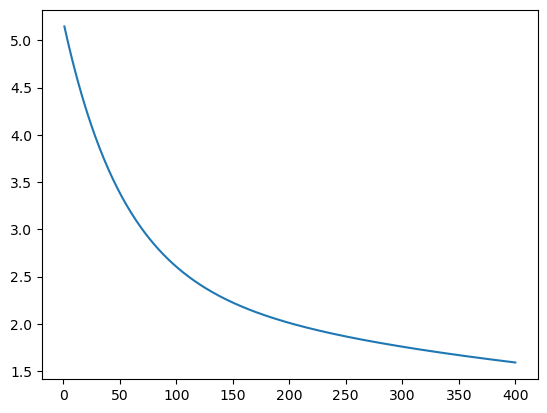

In [22]:
plt.plot(steps, errors)
plt.show()

# ADAM

In [39]:
class LinearRegressionAdam_new:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept=True, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = lr
        self.max_iteration = max_iter
        self.tolerance_convergence = tol
        self.intercept = intercept
        self.theta = None
        self.n = None
        self.d = None
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.s = None  # момент первого порядка
        self.v = None  # момент второго порядка
        self.t = 0

    def init_adam(self):
        self.theta = np.random.randn(self.d)
        self.s = np.zeros(self.d) # хранит квадраты градиентов
        self.v = np.zeros(self.d) # хранит экспоненциально взвешенные средние (усредненный градиент)

    def adam_update_weights(self, grad):
        self.t += 1
        self.s = self.beta1 * self.s + (1 - self.beta1) * grad # усредняем градиент
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2 # усредняем квадрат градиента
        s_hat = self.s / (1 - self.beta1**self.t) # корректируем оценки на начальные итерации (уменьшаем смещение на начальных итерациях)
        v_hat = self.v / (1 - self.beta2**self.t)
        update = self.learning_rate * s_hat / (np.sqrt(v_hat) + self.epsilon)
        self.theta -= update

    def fit(self, X, y):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        self.n, self.d = self.X.shape
        self.init_adam()
        
        steps, errors = [], []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.adam_update_weights(grad)
            
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0], 1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X)) / y).mean()



In [40]:
m_reg_adam_new = LinearRegressionAdam_new(lr=0.01, max_iter=400, tol=1e-3, intercept = True, beta1=0.9, beta2=0.999, epsilon=1e-8)

start_time = time.time()
steps, errors = m_reg_adam_new.fit(X_train, y_train)
print("Время обучения:", time.time() - start_time)
print("MSE_train: ", m_reg_adam_new.MSE(X_train, y_train))
print("MSE_test: ", m_reg_adam_new.MSE(X_test, y_test))
print("Коэффициенты: ", m_reg_adam_new.theta)

Время обучения: 6.452019691467285
MSE_train:  0.12802225093420633
MSE_test:  0.15029980146996375
Коэффициенты:  [-0.35170197  0.29750167  0.12339726  0.20921333 -0.07206118  0.43129725
  0.241854    0.36388246  0.22407571  0.50248946  0.10664403  0.00875362
  0.40023948 -0.47076274  0.15192823  0.9804354   0.47681881  0.31652173
 -0.16416458  0.4539228   0.2807239   0.22597466  0.1118072   0.37130645
  0.24886885  0.45731119  0.22878915  0.59744251  0.55870064  0.26132336
  0.01388288 -0.16345847  0.09174659  0.14788956  0.10857629  0.47687717
  0.47569717  0.57141982  0.46182418  0.35602638  0.41184417  0.44156452
  0.73560881  0.32578217  0.58072537  0.54709555  0.49966399  0.44300647
  0.40306187  0.27288765  0.39246993  0.51265321  0.29296032  0.41972779
  0.48347366  0.27270411  0.15158385  0.52239658  0.53469525  0.17394834
  0.36936452  0.06935266  0.1931417   0.35729291  0.34385568  0.50430598
  0.63005324  0.24657869  0.80555166  0.25128148  0.47686687  0.47277411
  0.63247451

In [1]:
# недостаток обычных градиентных алгоримов - застревание в локальных оптимумах
# momentum - метод импульсов (усредняем градиент по шагам с помощью экспоненциального скользящего среднего)
# v - сглаженные градиенты (v накапливает средние значения градиентов gamma - параметр экспоненциального скользящего среднего)
# регулируем, как много прошлых градиентов будем учитывать в итоговом значении
# уменьшаем амплитуды случайных изменений градиентов
# RMSProp
# не только сглаживаем градиенты, но и нормализация скорости изменения вектора весов
# когда параметров много, они могут сильно различаться, и получается так, что один параметр изменяется значительно быстрее, чем другой
# поэтому делаем перенормировку шага обучения
# для этого вычисляем скользящее экспоненциальное среднее для квадратов градиентов
# таким образов выравниваем скорость изменения коэф-ов (значения с большими градиентами начинают меняться медленнее)
# а с малыми градиентами быстрее
# adam - объединение momentum и RMSProp
# вычисляем экспоненциальные скользящие средние 
# выполняем нормировку, чтобы на первых итерациях работы алгоримта они принимали значения побольше, а на последующих менялись бы поменьше
